<a href="https://colab.research.google.com/github/ormorteey/BST-222-Survival-Analysis/blob/main/BST_222_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
p_load("tidyverse", "muhaz", "KMsurv", "survival")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


muhaz installed



### **Question 1**

The SSA standard mortality table for 2019 is found at [Mortality Table](https://www.ssa.gov/oact/STATS/table4c6.html).  Compute the net present value of a series of two payments of $1000 at the end of year 1 and at the end of year 2, each payment contingent on at least one of two people being alive at the time of the scheduled payment.  Individual 1 is male aged 80 and individual 2 is female aged 75.  You can assume that the chance of surviving a year at a given age is as given in the table.  Use a discount rate of 5%.

In [ ]:
pr_male_dies_in_yr_1 = 0.056205
pr_male_dies_in_yr_2 = 0.062327
pr_female_dies_in_yr_1 = 0.024064
pr_female_dies_in_yr_2 = 0.026814


In [ ]:
annuity_value_fn = function(t,M,P, rate){

  return (M * P/ (1 + rate)^t)

}

In [ ]:
pr_of_payout_in_yr_1 = 1 - pr_male_dies_in_yr_1 * pr_female_dies_in_yr_1


In [30]:
0.056205 * ( 1 - 0.024064 ) * ( 1 - 0.026814 )
( 1 - 0.056205 ) * ( 1 - 0.062327) * ( 1 - 0.024064 ) * ( 1 - 0.026814 )
( 1 - 0.056205 ) * 0.062327 * ( 1 - 0.024064 ) * ( 1 - 0.026814 )
( 1 - 0.056205 ) * ( 1 - 0.062327) * ( 1 - 0.024064 ) * ( 1 - 0.026814 )
( 1 - 0.056205 ) * ( 1 - 0.062327) * 0.024064
( 1 - 0.056205 ) * ( 1 - 0.062327) * ( 1 - 0.024064 ) * 0.026814

[1] 0.05338167

[1] 0.8405166

[1] 0.05586902

[1] 0.8405166

[1] 0.02129594

[1] 0.02315859

In [11]:
data("tongue")
data_df = tongue
head(data_df)
dim(data_df)

,type,time,delta
,<int>,<int>,<int>
1,1,1,1
2,1,3,1
3,1,3,1
4,1,4,1
5,1,10,1
6,1,13,1


[1] 80  3

The data set tongue from KMsurv is described in KM section 1.11

Description:
The ‘tongue’ data frame has 80 rows and 3 columns.

Format:
This data frame contains the following columns:

type: Tumor DNA profile (1=Aneuploid Tumor, 2=Diploid Tumor)

time: Time to death or on-study time, weeks

delta: Death indicator (0=alive, 1=dead)

(a) Construct and plot the Kaplan-Meier survival function estimates for the
two types of tumors, first without the confidence limits and then with
the confidence limits.

(b) Use survdiff to test the hypothesis that the two true survival curves are
the same. Interpret the results.

(c) Compare the two Kaplan-Meier curves to the Nelson-Aalen estimates
graphically. Interpret the results.

(d) To investigate the proportionality of the two hazard curves, compute and
plot the Nelson-Aalen cumulative hazards, the ratio of the cumulative
hazards, and the smoothed hazards using muhaz. Does it look as if the
hazards are proportional?


### **Question 2 a**

In [14]:
survival = Surv(time = data_df$time, event = data_df$delta)
KMcurves_with_CI = survfit(survival ~ type, data = data_df, conf.int = 0.95)

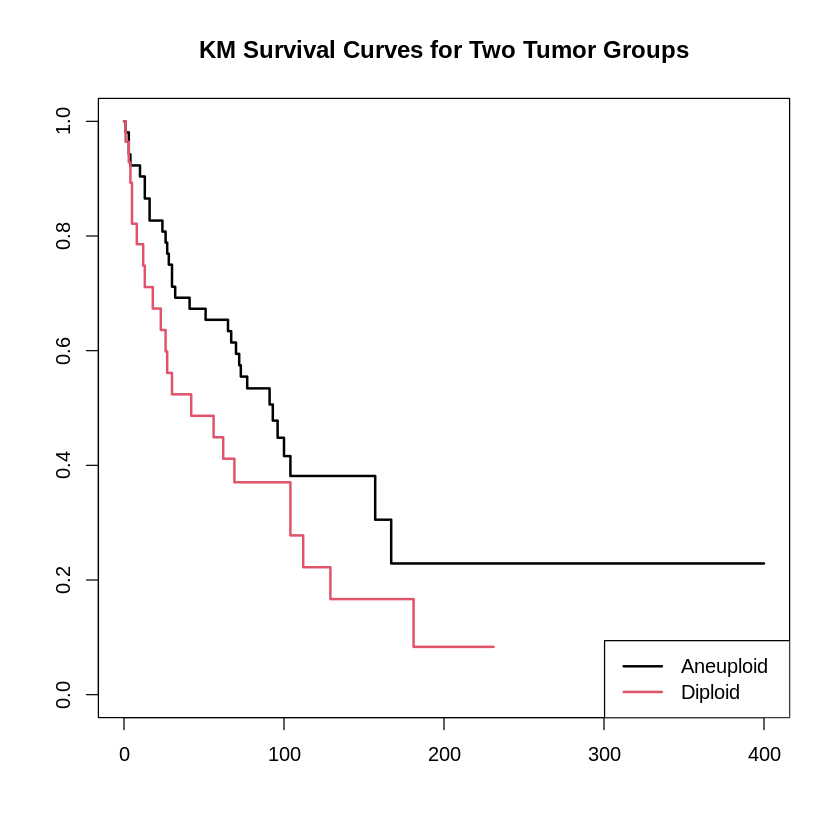

In [18]:
plot(KMcurves_with_CI, col = 1:2, lwd = 2)
title("KM Survival Curves for Two Tumor Groups")
legend("bottomright",c("Aneuploid","Diploid"),col=1:2,lwd=2)

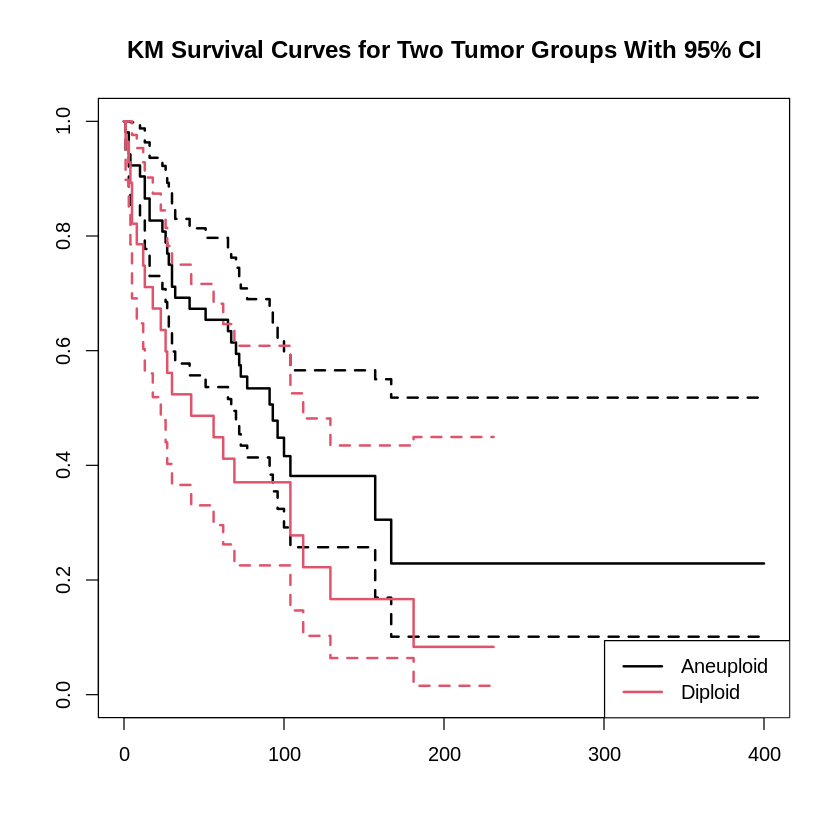

In [19]:
plot(KMcurves_with_CI, col = 1:2, lwd = 2, conf.int = TRUE)
title("KM Survival Curves for Two Tumor Groups With 95% CI")
legend("bottomright",c("Aneuploid","Diploid"),col=1:2,lwd=2)

### **Question 2 b**

In [20]:
survdiff(survival~ type, data = data_df)

Call:
survdiff(formula = survival ~ type, data = data_df)

        N Observed Expected (O-E)^2/E (O-E)^2/V
type=1 52       31     36.6     0.843      2.79
type=2 28       22     16.4     1.873      2.79

 Chisq= 2.8  on 1 degrees of freedom, p= 0.09 

The test gives a p-value of 0.09. This means the data doesn't provide enough evidence to suggest that  the KM survival curves are significantly different

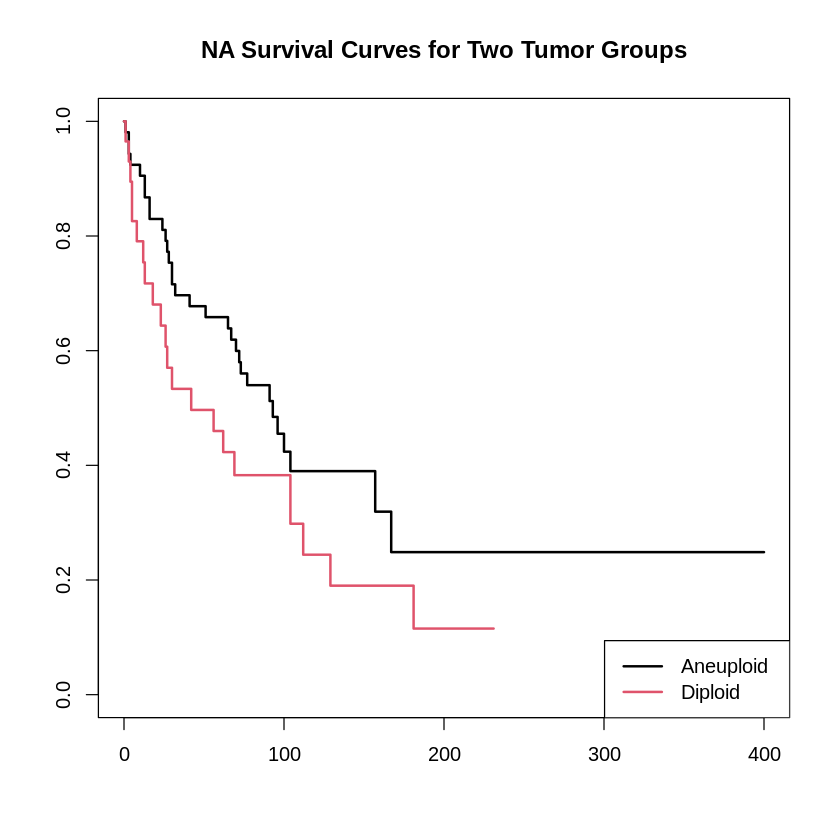

In [21]:
NAcurves <- survfit(survival ~ type ,type = "fleming-harrington", data = data_df)
plot(NAcurves, col=1:2, lwd = 2)
title("NA Survival Curves for Two Tumor Groups")
legend("bottomright",c("Aneuploid","Diploid"),col = 1:2,lwd = 2)

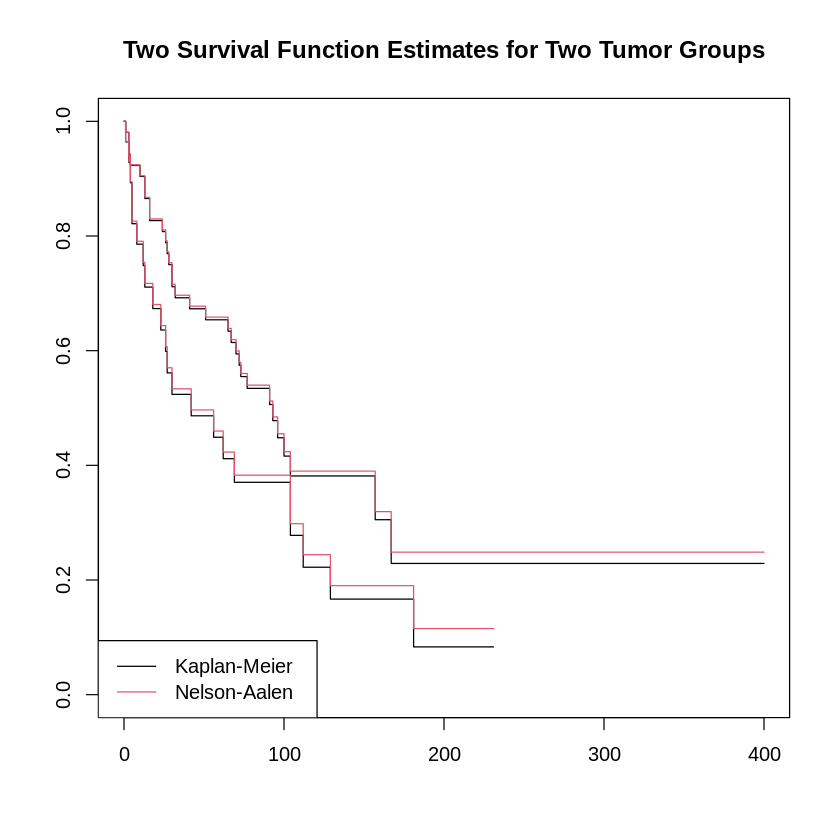

In [22]:
plot(KMcurves_with_CI)
lines(NAcurves, col = 2)
legend("bottomleft",c("Kaplan-Meier","Nelson-Aalen"), col = 1:2, lwd = 1)
title("Two Survival Function Estimates for Two Tumor Groups")

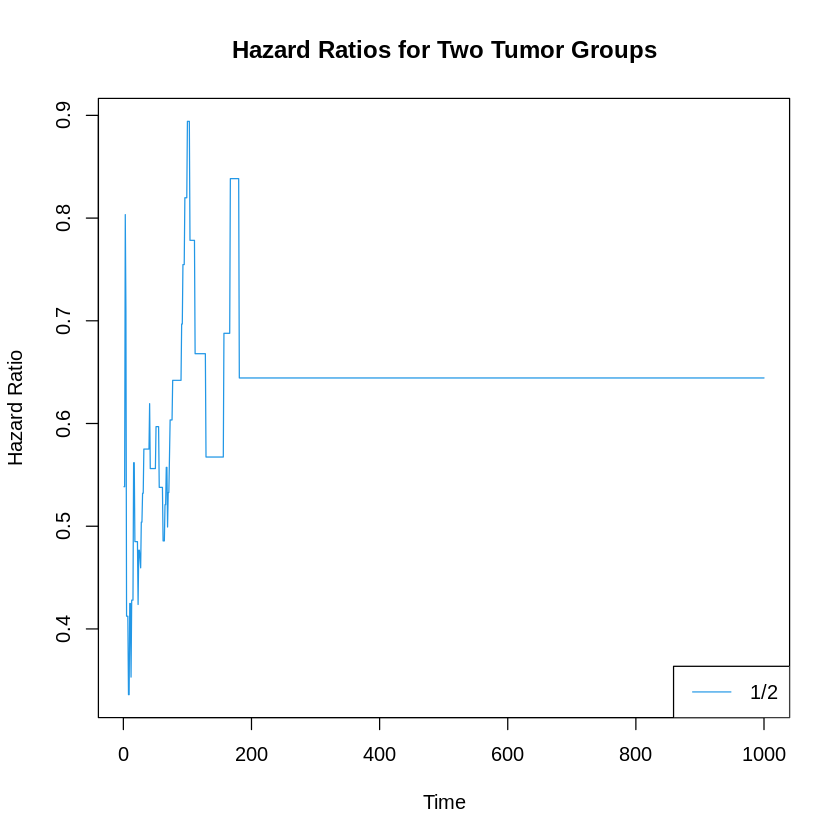

In [25]:
timevec = 1:1000
sf1 = stepfun(NAcurves[1]$time,c(1,NAcurves[1]$surv))
sf2 = stepfun(NAcurves[2]$time,c(1,NAcurves[2]$surv))
cumhaz1 = -log(sf1(timevec))
cumhaz2 = -log(sf2(timevec))


plot(timevec, cumhaz1/cumhaz2,type= "l", col = 4, ylab = "Hazard Ratio",xlab = "Time")

legend("bottomright", c("1/2"), col = 4, lwd = 1)
title("Hazard Ratios for Two Tumor Groups")


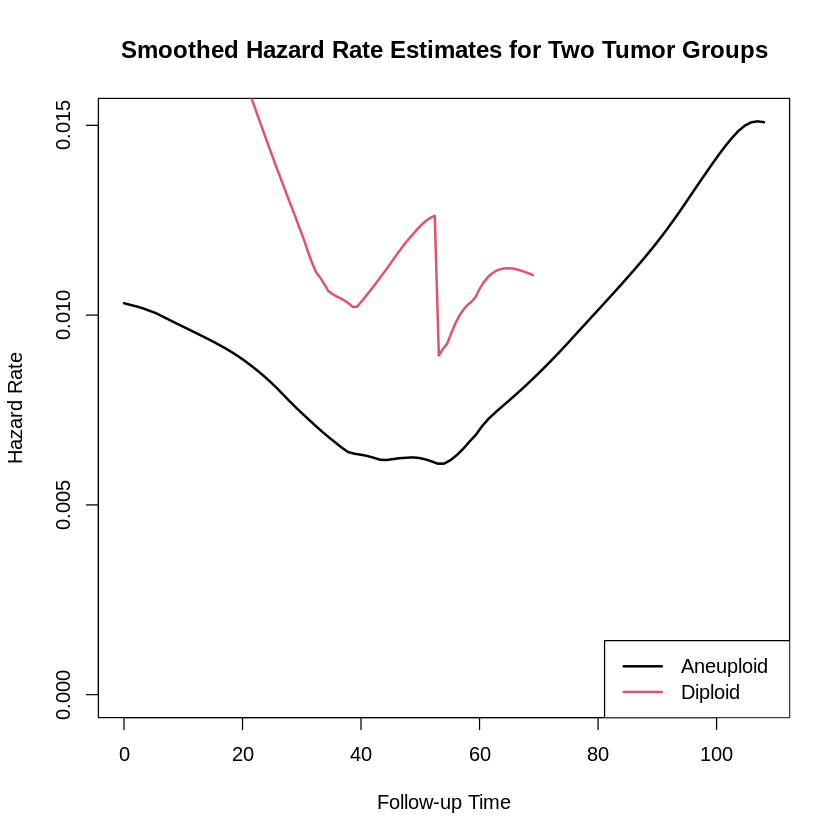

In [29]:
plot(muhaz( data_df$time, data_df$delta, data_df$type == 1),lwd = 2, col = 1)
lines(muhaz( data_df$time, data_df$delta, data_df$type == 2),lwd = 2, col = 2)
title("Smoothed Hazard Rate Estimates for Two Tumor Groups")
legend("bottomright",c("Aneuploid","Diploid"),col = 1:2,lwd = 2)
